In this data we are trying to predict the total claim amount of the insurance after any particular event or an incident. The data type here is continuous 
and we are going to use the linear regression as the favourable algorithm in further part.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
ac=pd.read_csv('Auto_claims.csv')
ac

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [3]:
ai=ac.drop(['Customer','State Code','Effective To Date','Policy','Sales Channel','Location Code'], axis=1)

The Columns like State code, sales channel are other columns which have been dropped are 
relatively not as usefull to predict the claimns for the automobile.

In [4]:
ai

,Country,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
0,US,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Married,69,32,5,0,1,Corporate Auto,Collision,384.811147,Two-Door Car,Medsize
1,US,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Single,94,13,42,0,8,Personal Auto,Scratch/Dent,1131.464935,Four-Door Car,Medsize
2,US,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Married,108,18,38,0,2,Personal Auto,Collision,566.472247,Two-Door Car,Medsize
3,US,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Married,106,18,65,0,7,Corporate Auto,Collision,529.881344,SUV,Medsize
4,US,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Single,73,12,44,0,1,Personal Auto,Collision,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,US,Missouri,2340.598798,No,Basic,Bachelor,Employed,M,71941,Married,73,18,89,0,2,Personal Auto,Hail,198.234764,Four-Door Car,Medsize
9130,US,Missouri,309.651122,Yes,Extended,College,Employed,F,21604,Divorced,79,14,28,0,1,Corporate Auto,Collision,379.200000,Four-Door Car,Medsize
9131,US,Missouri,816.389043,No,Extended,Bachelor,Unemployed,M,0,Single,85,9,37,3,2,Corporate Auto,Collision,790.784983,Four-Door Car,Medsize
9132,US,Missouri,752.444244,No,Extended,College,Employed,M,21941,Married,96,34,3,0,3,Personal Auto,Scratch/Dent,691.200000,Four-Door Car,Large


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ai['Response']=le.fit_transform(ai['Response'])
ai['Coverage']=le.fit_transform(ai['Coverage'])

In [6]:
ai['Education']=le.fit_transform(ai['Education'])
ai['EmploymentStatus']=le.fit_transform(ai['EmploymentStatus'])
ai['Gender']=le.fit_transform(ai['Gender'])
ai['Marital Status']=le.fit_transform(ai['Marital Status'])

In [7]:
ai['Policy Type']=le.fit_transform(ai['Policy Type'])
ai['Claim Reason']=le.fit_transform(ai['Claim Reason'])
ai['Vehicle Class']=le.fit_transform(ai['Vehicle Class'])
ai['Vehicle Size']=le.fit_transform(ai['Vehicle Size'])

In [8]:
ai['Country']=le.fit_transform(ai['Country'])
ai['State']=le.fit_transform(ai['State'])

In [9]:
ai

,Country,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,1,276.351928,0,0,0,1,0,56274,1,69,32,5,0,1,0,0,384.811147,5,1
1,0,3,697.953590,0,1,0,4,0,0,2,94,13,42,0,8,1,3,1131.464935,0,1
2,0,4,1288.743165,0,2,0,1,0,48767,1,108,18,38,0,2,1,0,566.472247,5,1
3,0,2,764.586183,0,0,0,4,1,0,1,106,18,65,0,7,0,0,529.881344,3,1
4,0,1,281.369258,0,0,0,1,1,43836,2,73,12,44,0,1,1,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,2340.598798,0,0,0,1,1,71941,1,73,18,89,0,2,1,1,198.234764,0,1
9130,0,2,309.651122,1,1,1,1,0,21604,0,79,14,28,0,1,0,0,379.200000,0,1
9131,0,2,816.389043,0,1,0,4,1,0,2,85,9,37,3,2,0,0,790.784983,0,1
9132,0,2,752.444244,0,1,1,1,1,21941,1,96,34,3,0,3,1,3,691.200000,0,0


In [10]:
ai.dtypes

Country                            int32
State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Claim Reason                       int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

In [11]:
ai.isnull().sum()

Country                          0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Claim Reason                     0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

It seems now there area no null values and no object type columns into the data, so we can go on with the 
further cleaning operations of data with the skewing and removing outliers in the further operations.

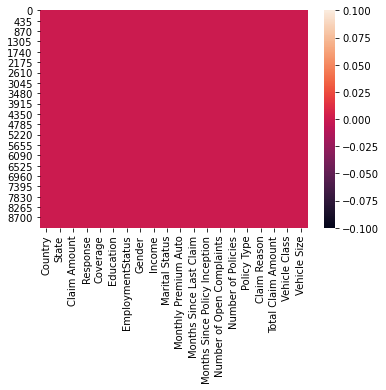

In [12]:
sns.heatmap(ai.isnull())

In [13]:
ai.describe()

,Country,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134.0,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.0,1.722684,800.494047,0.143201,0.480622,1.554084,1.825706,0.490037,37657.380009,1.120210,93.219291,15.097000,48.064594,0.384388,2.966170,0.825925,1.014889,434.088794,1.892380,1.089556
std,0.0,1.312397,687.096761,0.350297,0.655817,1.381978,1.347793,0.499928,30379.904734,0.636838,34.407967,10.073257,27.905991,0.910384,2.390182,0.475989,1.072331,290.500092,2.072992,0.537313
min,0.0,0.000000,189.800768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.099007,0.000000,0.000000
25%,0.0,0.000000,399.425179,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,68.000000,6.000000,24.000000,0.000000,1.000000,1.000000,0.000000,272.258244,0.000000,1.000000
50%,0.0,2.000000,578.018220,0.000000,0.000000,1.000000,1.000000,0.000000,33889.500000,1.000000,83.000000,14.000000,48.000000,0.000000,2.000000,1.000000,1.000000,383.945434,0.000000,1.000000
75%,0.0,3.000000,896.216704,0.000000,1.000000,3.000000,4.000000,1.000000,62320.000000,2.000000,109.000000,23.000000,71.000000,0.000000,4.000000,1.000000,2.000000,547.514839,4.000000,1.000000
max,0.0,4.000000,8332.538119,1.000000,2.000000,4.000000,4.000000,1.000000,99981.000000,2.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2.000000,3.000000,2893.239678,5.000000,2.000000


In [14]:
ai.corr()

,Country,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,NaN,1.000000,-0.006629,-0.001732,0.007558,0.004256,-0.004054,0.000545,0.002682,-0.008975,-0.005549,0.009249,-0.004459,0.014814,-0.005993,-0.009102,0.001845,-0.000816,-0.004813,-0.000956
Claim Amount,NaN,-0.006629,1.000000,-0.008930,0.168040,0.026038,-0.034846,-0.013610,0.024366,-0.026003,0.396262,0.011517,0.009418,-0.036343,0.021955,0.020011,-0.052004,0.226451,0.082307,0.017098
Response,NaN,-0.001732,-0.008930,1.000000,0.000642,0.000285,-0.016703,0.004396,0.011932,-0.094843,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.001110,-0.161332,0.016877,0.021225,-0.050691
Coverage,NaN,0.007558,0.168040,0.000642,1.000000,0.021573,0.003239,-0.014448,-0.010646,0.002956,0.458997,0.016925,0.010658,-0.007971,-0.013515,0.001469,-0.041627,0.279078,-0.017682,-0.003775
Education,NaN,0.004256,0.026038,0.000285,0.021573,1.000000,-0.025271,0.002206,0.018709,0.005675,0.023952,0.003021,0.004140,-0.023270,0.007266,0.011650,0.049994,0.020730,0.010192,-0.005491
EmploymentStatus,NaN,-0.004054,-0.034846,-0.016703,0.003239,-0.025271,1.000000,0.034960,-0.726741,0.311563,0.006269,0.008197,0.015376,0.007045,0.005035,-0.002240,-0.100479,0.330465,-0.002443,-0.011253
Gender,NaN,0.000545,-0.013610,0.004396,-0.014448,0.002206,0.034960,1.000000,-0.015138,0.034027,0.003918,0.025522,0.004198,-0.003012,0.016258,-0.002227,0.031730,0.074564,0.020043,-0.000347
Income,NaN,0.002682,0.024366,0.011932,-0.010646,0.018709,-0.726741,-0.015138,1.000000,-0.231673,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.002080,0.115622,-0.355254,0.004343,0.007945
Marital Status,NaN,-0.008975,-0.026003,-0.094843,0.002956,0.005675,0.311563,0.034027,-0.231673,1.000000,0.012423,0.007757,-0.029345,-0.000011,0.011664,0.013052,-0.019937,0.204675,0.017597,0.017493


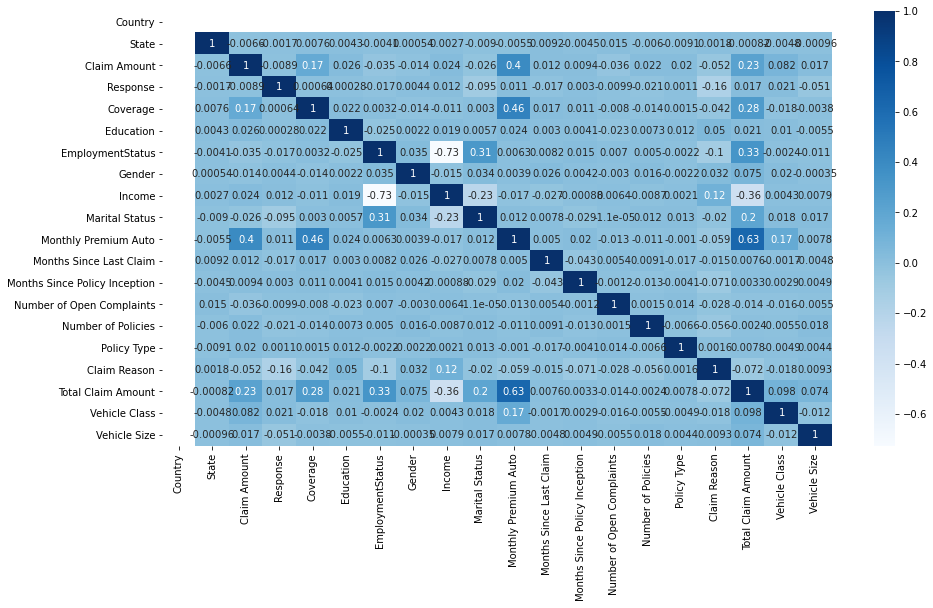

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(ai.corr(), annot=True, cmap='Blues')

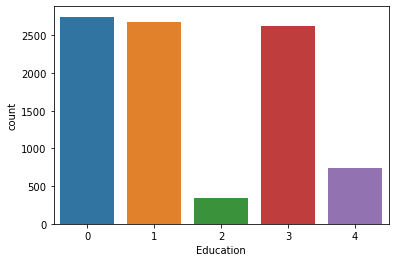

In [16]:
sns.countplot(x='Education', data=ai)

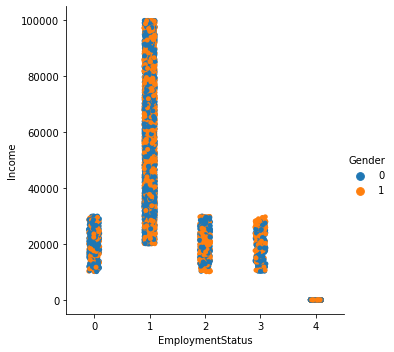

In [17]:
sns.catplot(x='EmploymentStatus', y='Income', hue='Gender', data=ai)

In the above graph we can clearly see that people who are employeed are 
having higher income let it be male or female, than any other class of employee staus.

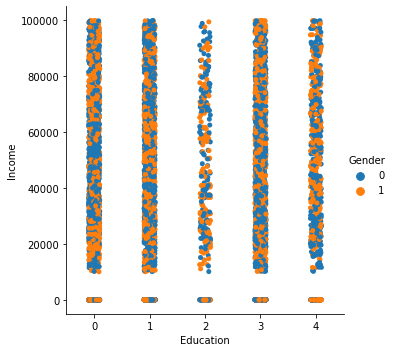

In [18]:
sns.catplot(x='Education', y='Income', hue='Gender', data=ai)

We can Clearly see in the above graph that there is no disparity amongst the gender, anyone and everyone
who is highly qualified has higher income as compare to others agianst any gender.

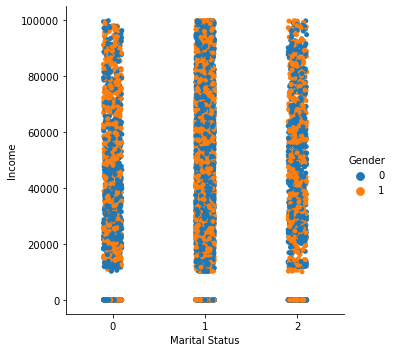

In [19]:
sns.catplot(x='Marital Status', y='Income', hue='Gender', data=ai)

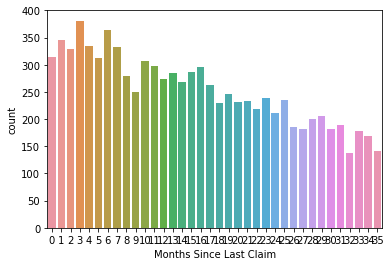

In [20]:
sns.countplot(x='Months Since Last Claim', data=ai)

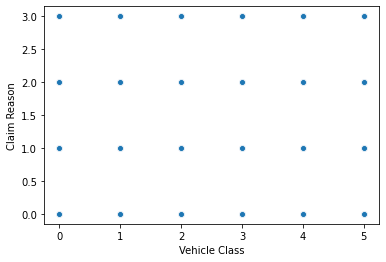

In [21]:
sns.scatterplot(x='Vehicle Class', y='Claim Reason', data=ai)

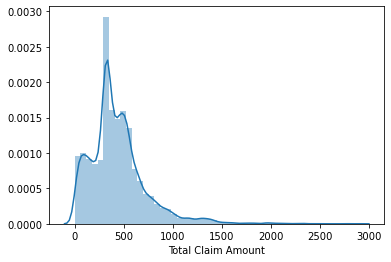

In [22]:
sns.distplot(ai['Total Claim Amount'])

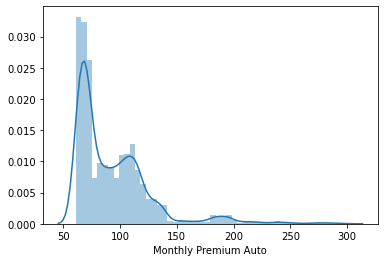

In [23]:
sns.distplot(ai['Monthly Premium Auto'])

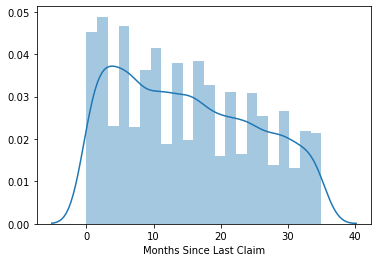

In [24]:
sns.distplot(ai['Months Since Last Claim'])

In [25]:
ai.skew()

Country                          0.000000
State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Claim Reason                     0.733526
Total Claim Amount               1.714966
Vehicle Class                    0.395146
Vehicle Size                     0.072742
dtype: float64

So, now we will try to remove the skewness of the data, we check whether a data is skewed or not by seeing if the value
is greater than 0.5 or -0.5 and if yes then we correct the skewed data

In [26]:
af=ai.copy()

(array([7.260e+03, 1.193e+03, 4.130e+02, 1.540e+02, 7.500e+01, 2.000e+01,
        1.000e+01, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([ 189.8007675 , 1004.07450265, 1818.3482378 , 2632.62197295,
        3446.8957081 , 4261.16944325, 5075.4431784 , 5889.71691355,
        6703.9906487 , 7518.26438385, 8332.538119  ]),
 <a list of 10 Patch objects>)

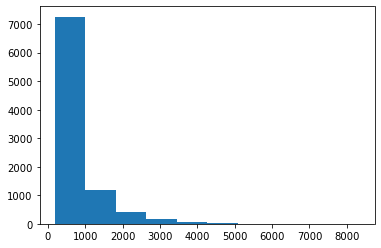

In [27]:
plt.hist(af['Claim Amount'], bins=10)

(array([7826.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1308.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

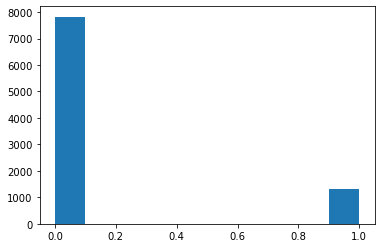

In [28]:
plt.hist(af['Response'],  bins=10)

(array([2.450e+03, 4.735e+03, 1.302e+03, 3.860e+02, 1.830e+02, 3.600e+01,
        2.300e+01, 1.300e+01, 4.000e+00, 2.000e+00]),
 array([9.90070000e-02, 2.89413074e+02, 5.78727141e+02, 8.68041208e+02,
        1.15735528e+03, 1.44666934e+03, 1.73598341e+03, 2.02529748e+03,
        2.31461154e+03, 2.60392561e+03, 2.89323968e+03]),
 <a list of 10 Patch objects>)

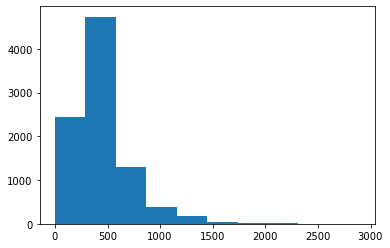

In [29]:
plt.hist(af['Total Claim Amount'], bins=10)

In [30]:
af['Claim Amount']=np.log1p(af['Claim Amount'])

(array([1154., 1181., 2350., 1942., 1161.,  676.,  415.,  191.,   51.,
          13.]),
 array([5.25122978, 5.62891114, 6.0065925 , 6.38427386, 6.76195522,
        7.13963659, 7.51731795, 7.89499931, 8.27268067, 8.65036203,
        9.02804339]),
 <a list of 10 Patch objects>)

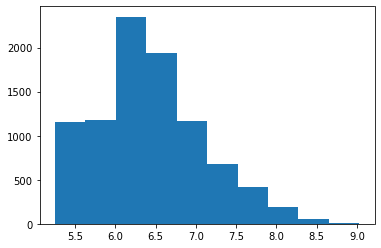

In [31]:
plt.hist(af['Claim Amount'], bins=10)

In [32]:
af['Response']=np.log1p(af['Claim Amount'])
af['Coverage']=np.log1p(af['Coverage'])
af['Monthly Premium Auto']=np.log1p(af['Monthly Premium Auto'])
af['Number of Open Complaints']=np.log1p(af['Number of Open Complaints'])
af['Number of Policies']=np.log1p(af['Number of Policies'])
af['Total Claim Amount']=np.log1p(af['Total Claim Amount'])

In [33]:
af.skew()

Country                          0.000000
State                            0.021065
Claim Amount                     0.578248
Response                         0.363703
Coverage                         0.700634
Education                        0.333148
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Marital Status                  -0.107553
Monthly Premium Auto             1.013663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.999011
Number of Policies               0.657633
Policy Type                     -0.468383
Claim Reason                     0.733526
Total Claim Amount              -1.741369
Vehicle Class                    0.395146
Vehicle Size                     0.072742
dtype: float64

(array([ 697., 1203., 1472., 1956., 1944.,  873.,  542.,  329.,  102.,
          16.]),
 array([1.83277821, 1.88003894, 1.92729967, 1.9745604 , 2.02182113,
        2.06908186, 2.11634259, 2.16360332, 2.21086405, 2.25812478,
        2.30538551]),
 <a list of 10 Patch objects>)

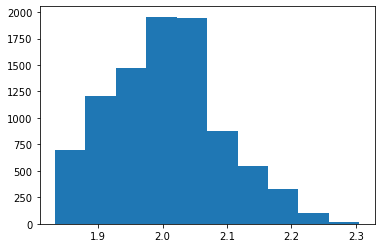

In [34]:
plt.hist(af['Response'],  bins=10)

(array([   8.,   27.,   61.,  107.,  270.,  619., 1186., 5023., 1679.,
         154.]),
 array([0.09440704, 0.88201411, 1.66962118, 2.45722825, 3.24483532,
        4.03244238, 4.82004945, 5.60765652, 6.39526359, 7.18287065,
        7.97047772]),
 <a list of 10 Patch objects>)

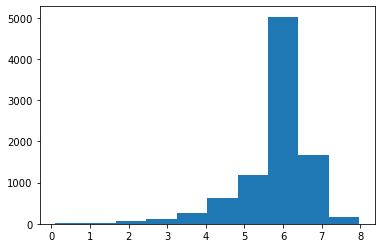

In [35]:
plt.hist(af['Total Claim Amount'], bins=10)

Now we need to check for the outliers if any as outliers are odd values, and can deviate the accuracy of the results.

In [36]:
af

,Country,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,1,5.625287,1.890894,0.000000,0,1,0,56274,1,4.248495,32,5,0.000000,0.693147,0,0,5.955348,5,1
1,0,3,6.549584,2.021493,0.693147,0,4,0,0,2,4.553877,13,42,0.000000,2.197225,1,3,7.032152,0,1
2,0,4,7.162198,2.099514,1.098612,0,1,0,48767,1,4.691348,18,38,0.000000,1.098612,1,0,6.341192,5,1
3,0,2,6.640642,2.033482,0.000000,0,4,1,0,1,4.672829,18,65,0.000000,2.079442,0,0,6.274539,3,1
4,0,1,5.643216,1.893596,0.000000,0,1,1,43836,2,4.304065,12,44,0.000000,0.693147,1,0,4.935415,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,7.758589,2.170035,0.000000,0,1,1,71941,1,4.304065,18,89,0.000000,1.098612,1,1,5.294484,0,1
9130,0,2,5.738670,1.907863,0.693147,1,1,0,21604,0,4.382027,14,28,0.000000,0.693147,0,0,5.940697,0,1
9131,0,2,6.706115,2.042014,0.693147,0,4,1,0,2,4.454347,9,37,1.386294,1.098612,0,0,6.674290,0,1
9132,0,2,6.624655,2.031387,0.693147,1,1,1,21941,1,4.574711,34,3,0.000000,1.386294,1,3,6.539875,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0xdadb760>,
 'caps': [<matplotlib.lines.Line2D at 0xdb52940>,
 'boxes': [<matplotlib.lines.Line2D at 0xdadbaf0>],
 'medians': [<matplotlib.lines.Line2D at 0xdb52f10>],
 'fliers': [<matplotlib.lines.Line2D at 0xdaf20d0>],
 'means': []}

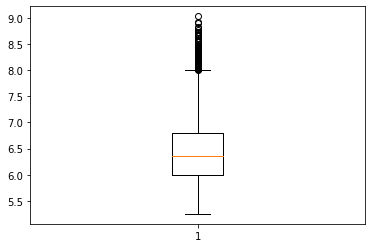

In [37]:
plt.boxplot(af['Claim Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0xef2e790>,
 'caps': [<matplotlib.lines.Line2D at 0xef2ee50>,
 'boxes': [<matplotlib.lines.Line2D at 0xef2e430>],
 'medians': [<matplotlib.lines.Line2D at 0xef3a550>],
 'fliers': [<matplotlib.lines.Line2D at 0xef3a850>],
 'means': []}

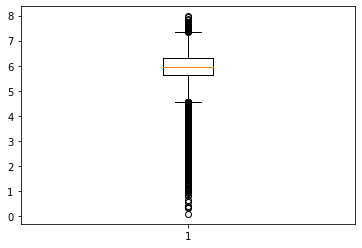

In [38]:
plt.boxplot(af['Total Claim Amount'])

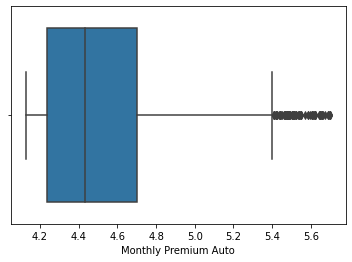

In [39]:
sns.boxplot(af['Monthly Premium Auto'])

In [40]:
af['Total Claim Amount'].describe()

count    9134.000000
mean        5.797731
std         0.896576
min         0.094407
25%         5.610417
50%         5.953102
75%         6.307214
max         7.970478
Name: Total Claim Amount, dtype: float64

In [41]:
af['Claim Amount'].describe()

count    9134.000000
mean        6.447889
std         0.651891
min         5.251230
25%         5.992527
50%         6.361334
75%         6.799297
max         9.028043
Name: Claim Amount, dtype: float64

In [42]:
af['Monthly Premium Auto'].describe()

count    9134.000000
mean        4.494058
std         0.304920
min         4.127134
25%         4.234107
50%         4.430817
75%         4.700480
max         5.700444
Name: Monthly Premium Auto, dtype: float64

In [43]:
af.describe()

,Country,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134.0,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.0,1.722684,6.447889,2.004188,0.307189,1.554084,1.825706,0.490037,37657.380009,1.120210,4.494058,15.097000,48.064594,0.203262,1.226869,0.825925,1.014889,5.797731,1.892380,1.089556
std,0.0,1.312397,0.651891,0.086076,0.398453,1.381978,1.347793,0.499928,30379.904734,0.636838,0.304920,10.073257,27.905991,0.429742,0.526663,0.475989,1.072331,0.896576,2.072992,0.537313
min,0.0,0.000000,5.251230,1.832778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.127134,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.094407,0.000000,0.000000
25%,0.0,0.000000,5.992527,1.944842,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.234107,6.000000,24.000000,0.000000,0.693147,1.000000,0.000000,5.610417,0.000000,1.000000
50%,0.0,2.000000,6.361334,1.996241,0.000000,1.000000,1.000000,0.000000,33889.500000,1.000000,4.430817,14.000000,48.000000,0.000000,1.098612,1.000000,1.000000,5.953102,0.000000,1.000000
75%,0.0,3.000000,6.799297,2.054034,0.693147,3.000000,4.000000,1.000000,62320.000000,2.000000,4.700480,23.000000,71.000000,0.000000,1.609438,1.000000,2.000000,6.307214,4.000000,1.000000
max,0.0,4.000000,9.028043,2.305386,1.098612,4.000000,4.000000,1.000000,99981.000000,2.000000,5.700444,35.000000,99.000000,1.791759,2.302585,2.000000,3.000000,7.970478,5.000000,2.000000


In [44]:
ae=af[(af['Months Since Policy Inception']<=71) & (af['Income']<=62320)]

In [45]:
ae=af[(af['Claim Amount']<=6.8) & (af['Total Claim Amount']<=6.4)]
ae=af[(af['Total Claim Amount']>=5)]

In [46]:
ae['Total Claim Amount'].describe()

count    7835.000000
mean        6.086015
std         0.473971
min         5.000494
25%         5.774411
50%         6.077087
75%         6.357842
max         7.970478
Name: Total Claim Amount, dtype: float64

In [47]:
ae

,Country,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,1,5.625287,1.890894,0.000000,0,1,0,56274,1,4.248495,32,5,0.000000,0.693147,0,0,5.955348,5,1
1,0,3,6.549584,2.021493,0.693147,0,4,0,0,2,4.553877,13,42,0.000000,2.197225,1,3,7.032152,0,1
2,0,4,7.162198,2.099514,1.098612,0,1,0,48767,1,4.691348,18,38,0.000000,1.098612,1,0,6.341192,5,1
3,0,2,6.640642,2.033482,0.000000,0,4,1,0,1,4.672829,18,65,0.000000,2.079442,0,0,6.274539,3,1
5,0,0,6.717357,2.043472,0.000000,0,1,0,62902,1,4.248495,14,94,0.000000,1.098612,1,1,5.077565,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,7.758589,2.170035,0.000000,0,1,1,71941,1,4.304065,18,89,0.000000,1.098612,1,1,5.294484,0,1
9130,0,2,5.738670,1.907863,0.693147,1,1,0,21604,0,4.382027,14,28,0.000000,0.693147,0,0,5.940697,0,1
9131,0,2,6.706115,2.042014,0.693147,0,4,1,0,2,4.454347,9,37,1.386294,1.098612,0,0,6.674290,0,1
9132,0,2,6.624655,2.031387,0.693147,1,1,1,21941,1,4.574711,34,3,0.000000,1.386294,1,3,6.539875,0,0


zscore was not used as there are was some issue the rows they were increased exponentionally, so used different way.

In [48]:
x=ae.drop('Total Claim Amount', axis=1)
y=ae.iloc[:,17]

In [49]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [50]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
x=pca.fit_transform(x)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for rstate in range(1,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rstate, test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_yl=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred_yl)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=rstate
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 31 to the r2 Score is 0.47746418490632103


In [52]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=49, test_size=0.20)
ln=LinearRegression()
ln.fit(x_train,y_train)
pred_yl=ln.predict(x_test)
r2_scr=r2_score(y_test,pred_yl)

In [53]:
r2_scr

0.44351836893100727

In [54]:
from sklearn.model_selection import cross_val_score
cr_val_scr=cross_val_score(ln,x,y,cv=5,scoring='r2').mean()
cr_val_scr

0.4362251423314074

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000]}
grrb=GridSearchCV(gbr,parameters,cv=5)
grrb.fit(x,y)
grrb.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [56]:
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
print('The cross Val Score',cross_val_score(gbr,x,y,cv=5, scoring='r2').mean())

The cross Val Score 0.47247340839909013


In [57]:
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_y=gbr.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)
print(mean_squared_error(y_test,pred_y))


r2 score 0.4330114879791903
0.12608905910758747


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(x,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 1}
0.43622545974105903
{'alpha': 0.001}
0.4362943108228766


In [60]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_y=ls.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)
print('mean squared error', mean_squared_error(y_test,pred_y))

r2 score 0.443641826945263
mean squared error 0.12372504394712222


In [61]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_y=rd.predict(x_test)
r2_scr=r2_score(y_test,pred_y)
print('r2 score',r2_scr)
print('mean squared error', mean_squared_error(y_test,pred_y))

r2 score 0.44353041868519083
mean squared error 0.12374981933920069


In [64]:
df1=pd.DataFrame(pred_y)
df1.to_csv('gbr_prediction.csv')

In [62]:
import joblib
joblib.dump(gbr,'gbr_Auto_claims.pkl')

['gbr_Auto_claims.pkl']